## Data for Seattle Transportation Report

#### The data used here will be used to find correltation strength between different type of road conditions and severity of accidents. Severity of accidents will include points such as fatalities, the number of people involved, the type of injuries to the passengers, how many vehicles were involved and a few others. Natural factors including fallen objects, weather conditions such as wind, rain, fog, and snow, and time of day will also be used in finding correlation to the severity of accidents. This is all done with the purpose of being able to let drivers know the possibility and severity of accidents under certain weather conditions.

X,Y- The coordinates of the accident.

LOCATION- The location of the accident.

SEVERITYCODE- A scale of 1-5 about how severe the accident is (with 5 being the most severe).

SEVERITYDESC- A description of the the severity of the accident.

COLLISIONTYPE- Different types of collisions such as parked cars, rear ends, angles, etc.

PERSONCOUNT- The amount of people involved in the accident.

PEDCOUNT- The number of pedestrians involved in the accident.

PEDCYCLCOUNT- The number of cyclists involved in the accident.

VEHCOUNT- The number of vehicles involved in the accident.

INJURIES- The number of injuries involved in the accident.

SERIOUSINJURIES- The number of serious injuries involved in the accident.

FATALITIES- The number of deaths that occurred because of the accident.

INCDTTM- The date and time of the accident.

JUNCTIONTYPE- The type of junction where the accident occurred (intersection, drive-way, etc).

SDOT_COLDESC- Seattle's description about the accident.

UNDERINFL- Was the driver under the influence of drugs or alcohol?

WEATHER- What was the weather like when the accident occurred?

ROADCOND- What was the condition of the road when the accident happened?

LIGHTCOND- What time of day was it and how much light was there out?

SPEEDING- Was the driver speeding?

HITPARKEDCAR- Did the driver of the moving vehicle hit a parked car?

In [34]:
import pandas as pd
import numpy as np
import matplotlib as mp
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import itertools

In [35]:
df = pd.read_csv("http://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv")
pd.set_option('display.max_columns', None)
df.drop(['STATUS','OBJECTID','INCKEY','INCDATE','COLDETKEY','REPORTNO','ADDRTYPE','INTKEY','EXCEPTRSNCODE','EXCEPTRSNDESC','SDOT_COLCODE','ST_COLCODE','INATTENTIONIND','SDOTCOLNUM','PEDROWNOTGRNT','SEGLANEKEY','CROSSWALKKEY','ST_COLDESC'], axis=1, inplace=True)
df.head()

,X,Y,LOCATION,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INCDTTM,JUNCTIONTYPE,SDOT_COLDESC,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,HITPARKEDCAR
0,-122.356511,47.517361,17TH AVE SW AND SW ROXBURY ST,1,Property Damage Only Collision,Angles,2,0,0,2,0,0,0,1/19/2020 9:01:00 AM,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Clear,Dry,Daylight,NaN,N
1,-122.361405,47.702064,HOLMAN RD NW BETWEEN 4TH AVE NW AND 3RD AVE NW,1,Property Damage Only Collision,Rear Ended,2,0,0,2,0,0,0,4/11/2005 6:31:00 PM,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",0,Raining,Wet,Dusk,NaN,N
2,-122.317414,47.664028,ROOSEVELT WAY NE BETWEEN NE 47TH ST AND NE 50T...,2,Injury Collision,Head On,2,0,0,2,1,0,0,3/31/2013 2:09:00 AM,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Clear,Dry,Dark - Street Lights On,NaN,N
3,-122.318234,47.619927,11TH AVE E AND E JOHN ST,2,Injury Collision,Pedestrian,3,1,0,1,1,0,0,1/6/2020 5:55:00 PM,At Intersection (intersection related),MOTOR VEHCILE STRUCK PEDESTRIAN,N,Raining,Wet,Dark - Street Lights On,NaN,N
4,-122.351724,47.560306,WEST MARGINAL WAY SW BETWEEN SW ALASKA ST AND ...,2,Injury Collision,Other,2,0,0,1,1,0,0,12/25/2009 7:00:00 PM,Mid-Block (not related to intersection),MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT,0,Clear,Ice,Dark - Street Lights On,Y,N


In [36]:
print('Total number of Collisions:', df.shape[0])
print('Total number of Features:', df.shape[1])
print(df.dtypes)

Total number of Collisions: 221738
Total number of Features: 22
X                  float64
Y                  float64
LOCATION            object
SEVERITYCODE        object
SEVERITYDESC        object
COLLISIONTYPE       object
PERSONCOUNT          int64
PEDCOUNT             int64
PEDCYLCOUNT          int64
VEHCOUNT             int64
INJURIES             int64
SERIOUSINJURIES      int64
FATALITIES           int64
INCDTTM             object
JUNCTIONTYPE        object
SDOT_COLDESC        object
UNDERINFL           object
WEATHER             object
ROADCOND            object
LIGHTCOND           object
SPEEDING            object
HITPARKEDCAR        object
dtype: object


In [37]:
print(df.shape)

(221738, 22)


In [38]:
df.dropna(subset = ["WEATHER"], inplace = True)
df.dropna(subset = ["ROADCOND"], inplace = True)
df.dropna(subset = ["SEVERITYCODE"], inplace = True)
df.dropna(subset = ["UNDERINFL"], inplace = True)
df.dropna(subset = ["INJURIES"], inplace = True)
df.dropna(subset = ['LIGHTCOND'], inplace=True)

In [39]:
weather = df[ df['WEATHER'] == "Unknown" ].index
df.drop(weather, inplace = True)
roadcond = df[ df['ROADCOND'] == "Unknown" ].index
df.drop(roadcond, inplace = True)
lightcond = df[ df['LIGHTCOND'] == "Unknown" ].index
df.drop(lightcond, inplace = True)

In [40]:
df['UNDERINFL'] = df['UNDERINFL'].replace(['0'],'N')
df['UNDERINFL'] = df['UNDERINFL'].replace(['1'],'Y')

In [41]:
print(df.shape)

(175894, 22)


In [42]:
df['WEATHER'].value_counts(normalize = True)

Clear                       0.640084
Raining                     0.191138
Overcast                    0.158101
Snowing                     0.004793
Fog/Smog/Smoke              0.003201
Other                       0.001563
Sleet/Hail/Freezing Rain    0.000648
Blowing Sand/Dirt           0.000267
Severe Crosswind            0.000148
Partly Cloudy               0.000057
Name: WEATHER, dtype: float64

In [43]:
df['LIGHTCOND'].value_counts(normalize = True)

Daylight                    0.660756
Dark - Street Lights On     0.275467
Dusk                        0.033213
Dawn                        0.014378
Dark - No Street Lights     0.008289
Dark - Street Lights Off    0.006584
Other                       0.001188
Dark - Unknown Lighting     0.000125
Name: LIGHTCOND, dtype: float64

In [44]:
seattle_data = df[['ROADCOND','WEATHER','LIGHTCOND','UNDERINFL','PERSONCOUNT']]

In [45]:
df['SEVERITYCODE'].replace(to_replace=['2b','3'], value=[3,4],inplace=True)

In [46]:
#going to do some grouping so there are less caterogories
df['WEATHER']=np.where(df['WEATHER'] =='Raining','Precipitation',df['WEATHER'])
df['WEATHER']=np.where(df['WEATHER'] =='Snowing','Precipitation',df['WEATHER'])
df['WEATHER']=np.where(df['WEATHER'] =='Sleet/Hail/Freezing Rain','Precipitation',df['WEATHER'])
df['WEATHER'].unique()
df['LIGHTCOND']=np.where(df['LIGHTCOND'] == 'Dark - No Street Lights','Dark',df['LIGHTCOND'])
df['LIGHTCOND']=np.where(df['LIGHTCOND'] == 'Dark - Street Lights On','Dark',df['LIGHTCOND'])
df['LIGHTCOND']=np.where(df['LIGHTCOND'] == 'Dark - Street Lights Off','Dark',df['LIGHTCOND'])
df['LIGHTCOND']=np.where(df['LIGHTCOND'] == 'Dark - Unknown Lighting','Dark',df['LIGHTCOND'])
df['LIGHTCOND'].unique()

array(['Daylight', 'Dusk', 'Dark', 'Dawn', 'Other'], dtype=object)

In [47]:
a = np.array(df['INJURIES'].values.tolist())
df['INJURIES'] = np.where(a > 0, 1, a).tolist()
df['INJURIES'].value_counts()

0    116207
1     59687
Name: INJURIES, dtype: int64

In [48]:
count_no_inj = len(df[df['INJURIES']==0])
count_inj = len(df[df['INJURIES']==1])
pct_of_no_inj = count_no_inj/(count_no_inj+count_inj)
print("percentage of no injury is", pct_of_no_inj*100)
pct_of_inj = count_inj/(count_no_inj+count_inj)
print("percentage of injury", pct_of_inj*100)

percentage of no injury is 66.06649459333462
percentage of injury 33.933505406665375


In [49]:
df.groupby('INJURIES').mean()

,X,Y,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SERIOUSINJURIES,FATALITIES
INJURIES,,,,,,,,,
0,-122.330495,47.617806,1.005748,2.391207,0.006979,0.005602,1.999940,0.000052,0.001962
1,-122.330178,47.620971,2.054049,2.728685,0.122757,0.087305,1.890227,0.055138,0.002195


Text(0, 0.5, 'Frequency of Injury')

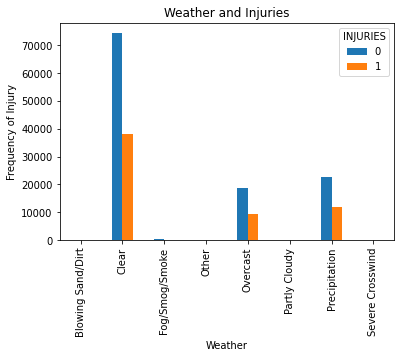

In [50]:
%matplotlib inline
pd.crosstab(df.WEATHER,df.INJURIES).plot(kind='bar')
plt.title('Weather and Injuries')
plt.xlabel('Weather')
plt.ylabel('Frequency of Injury')

Text(0, 0.5, 'Injury')

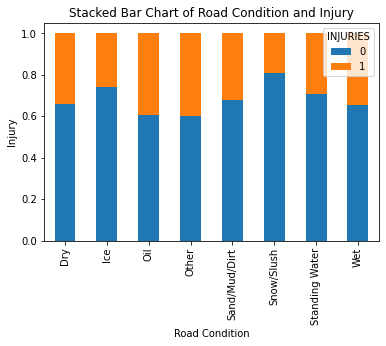

In [51]:
table=pd.crosstab(df.ROADCOND,df.INJURIES)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Road Condition and Injury')
plt.xlabel('Road Condition')
plt.ylabel('Injury')

Text(0, 0.5, 'Injury')

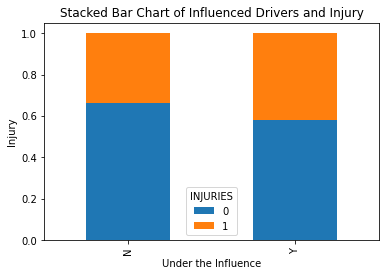

In [52]:
table=pd.crosstab(df.UNDERINFL,df.INJURIES)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Influenced Drivers and Injury')
plt.xlabel('Under the Influence')
plt.ylabel('Injury')

Text(0, 0.5, 'Injury')

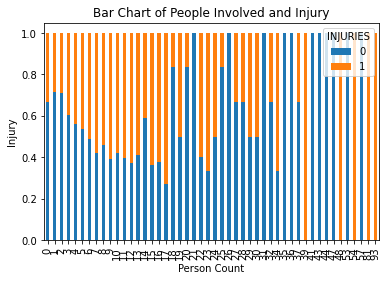

In [53]:
table=pd.crosstab(df.PERSONCOUNT,df.INJURIES)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Bar Chart of People Involved and Injury')
plt.xlabel('Person Count')
plt.ylabel('Injury')

Text(0, 0.5, 'Injury')

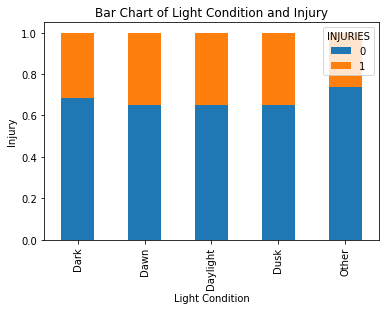

In [54]:
table=pd.crosstab(df.LIGHTCOND,df.INJURIES)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Bar Chart of Light Condition and Injury')
plt.xlabel('Light Condition')
plt.ylabel('Injury')

In [55]:
cat_vars=['ROADCOND','WEATHER','LIGHTCOND','UNDERINFL','PERSONCOUNT']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(seattle_data[var], prefix=var)
    data=seattle_data.join(cat_list)
cat_vars=['ROADCOND','WEATHER','LIGHTCOND','UNDERINFL','PERSONCOUNT']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
data_final=data[to_keep]
Feature = data_final

In [56]:
import sklearn as sklearn 
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

In [57]:
X = Feature
X[0:5]

,PERSONCOUNT_0,PERSONCOUNT_1,PERSONCOUNT_2,PERSONCOUNT_3,PERSONCOUNT_4,PERSONCOUNT_5,PERSONCOUNT_6,PERSONCOUNT_7,PERSONCOUNT_8,PERSONCOUNT_9,PERSONCOUNT_10,PERSONCOUNT_11,PERSONCOUNT_12,PERSONCOUNT_13,PERSONCOUNT_14,PERSONCOUNT_15,PERSONCOUNT_16,PERSONCOUNT_17,PERSONCOUNT_18,PERSONCOUNT_19,PERSONCOUNT_20,PERSONCOUNT_21,PERSONCOUNT_22,PERSONCOUNT_23,PERSONCOUNT_24,PERSONCOUNT_25,PERSONCOUNT_26,PERSONCOUNT_27,PERSONCOUNT_28,PERSONCOUNT_29,PERSONCOUNT_30,PERSONCOUNT_31,PERSONCOUNT_32,PERSONCOUNT_34,PERSONCOUNT_35,PERSONCOUNT_36,PERSONCOUNT_37,PERSONCOUNT_39,PERSONCOUNT_41,PERSONCOUNT_43,PERSONCOUNT_44,PERSONCOUNT_47,PERSONCOUNT_48,PERSONCOUNT_53,PERSONCOUNT_54,PERSONCOUNT_57,PERSONCOUNT_81,PERSONCOUNT_93
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [58]:
y = df['INJURIES'].values
y[0:10]

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 0])

In [59]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:1]

array([[-0.17667199, -0.26612069,  0.89673494, -0.49953981, -0.30046855,
        -0.19871821, -0.12623606, -0.08165456, -0.05544154, -0.0356289 ,
        -0.02730058, -0.01816185, -0.01410755, -0.01118441, -0.01118441,
        -0.00790832, -0.00674418, -0.00790832, -0.0058406 , -0.0058406 ,
        -0.0058406 , -0.00337203, -0.0053317 , -0.00412989, -0.00337203,
        -0.0058406 , -0.0047688 , -0.00412989, -0.00412989, -0.0047688 ,
        -0.00337203, -0.00337203, -0.00412989, -0.00412989, -0.00238438,
        -0.00337203, -0.00412989, -0.00238438, -0.00238438, -0.00238438,
        -0.0058406 , -0.00412989, -0.00238438, -0.00238438, -0.00238438,
        -0.00238438, -0.00238438, -0.00238438]])

In [60]:
#Decision Tree
X_traindc, X_testdc, y_traindc, y_testdc = train_test_split( X, y, test_size=0.2, random_state=4)
print(X_traindc.shape, y_traindc.shape)
print(X_testdc.shape, y_testdc.shape)

(140715, 48) (140715,)
(35179, 48) (35179,)


In [61]:
#Decision Tree
Loan_tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
Loan_tree.fit(X_traindc, y_traindc)
PTree = Loan_tree.predict(X_testdc)
print(PTree [0:5])
print(y_testdc [0:5])

[0 0 0 0 0]
[1 1 0 0 0]


In [62]:
#LogisticRegression
X_trainlr, X_testlr, y_trainlr, y_testlr = train_test_split(X, y, test_size=0.2, random_state=4)
print(X_trainlr.shape, y_trainlr.shape)
print(X_testlr.shape, y_testlr.shape)

(140715, 48) (140715,)
(35179, 48) (35179,)


In [63]:
#LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_trainlr,y_trainlr)
yhatlr = LR.predict(X_testlr)

In [64]:
#LogisticRegression
lg = LogisticRegression()
lg.fit(X_trainlr, y_trainlr)

LogisticRegression()

In [67]:
#LogisticRegression
confusion_matrix = confusion_matrix(y_testlr, yhatlr)
print(confusion_matrix)

[[22745   457]
 [11440   537]]


<AxesSubplot:>

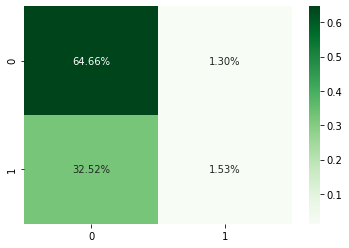

In [68]:
#LogisticRegression
sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True, 
            fmt='.02%', cmap='Greens')

In [69]:
#GradientBoosting
X_traingb, X_val, y_traingb, y_val = train_test_split(X, y,  test_size=.2, random_state=0)

In [70]:
#GradientBoosting
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_traingb, y_traingb)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_traingb, y_traingb)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_val, y_val)))

Learning rate:  0.05
Accuracy score (training): 0.661
Accuracy score (validation): 0.659
Learning rate:  0.075
Accuracy score (training): 0.661
Accuracy score (validation): 0.659
Learning rate:  0.1
Accuracy score (training): 0.661
Accuracy score (validation): 0.659
Learning rate:  0.25
Accuracy score (training): 0.661
Accuracy score (validation): 0.659
Learning rate:  0.5
Accuracy score (training): 0.662
Accuracy score (validation): 0.659
Learning rate:  0.75
Accuracy score (training): 0.663
Accuracy score (validation): 0.660
Learning rate:  1
Accuracy score (training): 0.663
Accuracy score (validation): 0.660


In [71]:
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.svm import SVC

In [72]:
#GradientBoosting

gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(X_traingb, y_traingb)
predictions = gb_clf2.predict(X_val)

print("Confusion Matrix:")
print(confusion_matrix(y_val, predictions))

print("Classification Report")
print(classification_report(y_val, predictions))

Confusion Matrix:
[[23147    28]
 [11965    39]]
Classification Report
              precision    recall  f1-score   support

           0       0.66      1.00      0.79     23175
           1       0.58      0.00      0.01     12004

    accuracy                           0.66     35179
   macro avg       0.62      0.50      0.40     35179
weighted avg       0.63      0.66      0.53     35179



In [73]:
from sklearn.naive_bayes import GaussianNB
X_trainnb, X_testnb, y_trainnb, y_testnb = train_test_split(X, y, test_size=0.2, random_state=0)
gnb = GaussianNB()
y_prednb = gnb.fit(X_trainnb, y_trainnb).predict(X_testnb)
print("Number of mislabeled points out of a total %d points : %d"
% (X_testnb.shape[0], (y_testnb != y_prednb).sum()))

Number of mislabeled points out of a total 35179 points : 23176


In [74]:
#Decision Tree
print(metrics.accuracy_score(y_testdc, PTree))

f1_score(y_testdc, PTree, average='weighted')

0.6595412035589414


0.5242347683312913

In [75]:
#LogisticRegression
y_hat = lg.predict(X_testlr)
print(metrics.accuracy_score(y_testlr,yhatlr))

print(f1_score(y_testlr, yhatlr, average='weighted'))

print(lg.score(X_testlr, y_testlr))

0.661815287529492
0.5510005753672534
0.661815287529492


In [76]:
#GradientBoosting
print(metrics.accuracy_score(y_val, predictions))

f1_score(y_val, predictions, average='weighted')

0.6590863867648313


0.5254308533576079

In [77]:
#GAussianNaiveBayes
print(metrics.accuracy_score(y_testnb, y_prednb))

f1_score(y_testnb, y_prednb, average = 'weighted')

0.3411978737314875


0.174061764527184